In [3]:
import pandas as pd

# Load the dataset
file_path = 'healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Fill missing BMI values with the median BMI
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
print("Missing values after filling BMI:")
print(df.isnull().sum())


Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Missing values after filling BMI:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [5]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

print("Standardized column names:")
print(df.columns)


Standardized column names:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [6]:
# Encode 'gender', 'ever_married', 'work_type', 'residence_type', and 'smoking_status'
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status'], drop_first=True)

print("Dataset after encoding categorical variables:")
print(df.head())


Dataset after encoding categorical variables:
      id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1             228.69  36.6       1   
1  51676  61.0             0              0             202.21  28.1       1   
2  31112  80.0             0              1             105.92  32.5       1   
3  60182  49.0             0              0             171.23  34.4       1   
4   1665  79.0             1              0             174.12  24.0       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
1        False         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   

   work_type_Private  work_t

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalize 'age', 'avg_glucose_level', and 'bmi'
scaler = MinMaxScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

print("Dataset after normalizing numerical features:")
print(df.head())


Dataset after normalizing numerical features:
      id       age  hypertension  heart_disease  avg_glucose_level       bmi  \
0   9046  0.816895             0              1           0.801265  0.301260   
1  51676  0.743652             0              0           0.679023  0.203895   
2  31112  0.975586             0              1           0.234512  0.254296   
3  60182  0.597168             0              0           0.536008  0.276060   
4   1665  0.963379             1              0           0.549349  0.156930   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1         True         False              True   
1       1        False         False              True   
2       1         True         False              True   
3       1        False         False              True   
4       1        False         False              True   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True       

In [8]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_healthcare_stroke_data.csv', index=False)

print("Cleaned dataset saved as 'cleaned_healthcare_stroke_data.csv'")


Cleaned dataset saved as 'cleaned_healthcare_stroke_data.csv'


In [9]:
# Display summary statistics for numerical columns
print("Summary statistics for numerical features:")
print(df.describe())

# Count the distribution of target variable 'stroke'
print("\nStroke distribution (0 = No, 1 = Yes):")
print(df['stroke'].value_counts(normalize=True) * 100)


Summary statistics for numerical features:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354     0.526692      0.097456       0.054012   
std    21161.721625     0.276033      0.296607       0.226063   
min       67.000000     0.000000      0.000000       0.000000   
25%    17741.250000     0.304199      0.000000       0.000000   
50%    36932.000000     0.548340      0.000000       0.000000   
75%    54682.000000     0.743652      0.000000       0.000000   
max    72940.000000     1.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean            0.235563     0.212624     0.048728  
std             0.209046     0.088197     0.215320  
min             0.000000     0.000000     0.000000  
25%             0.102137     0.154639     0.000000  
50%             0.169721     0.203895     0.000000  


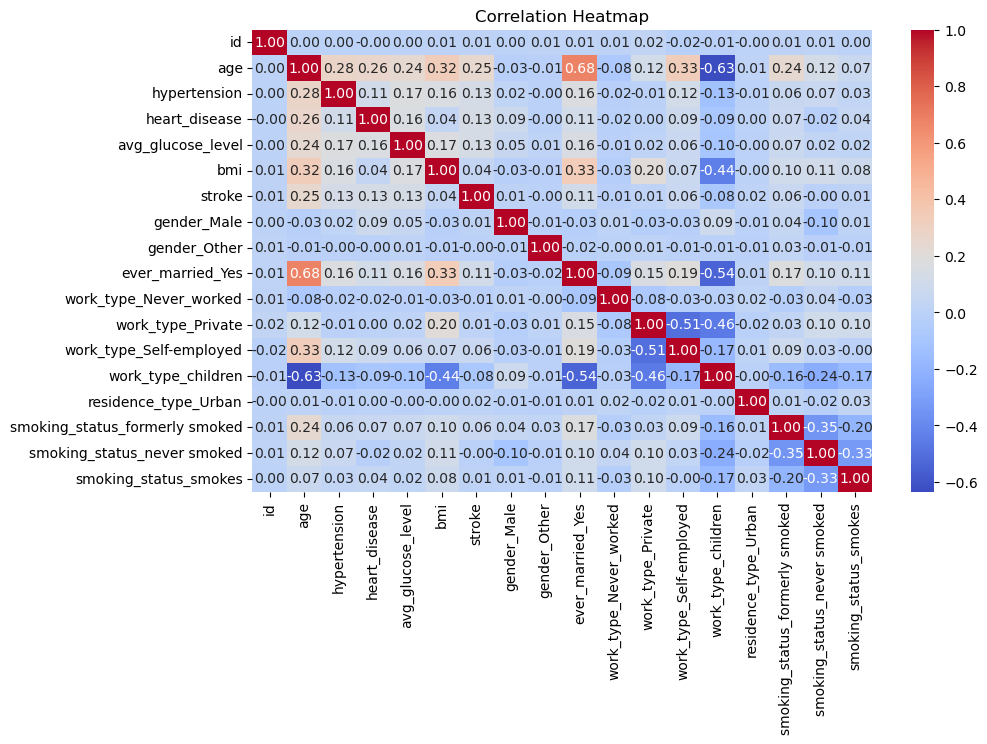

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


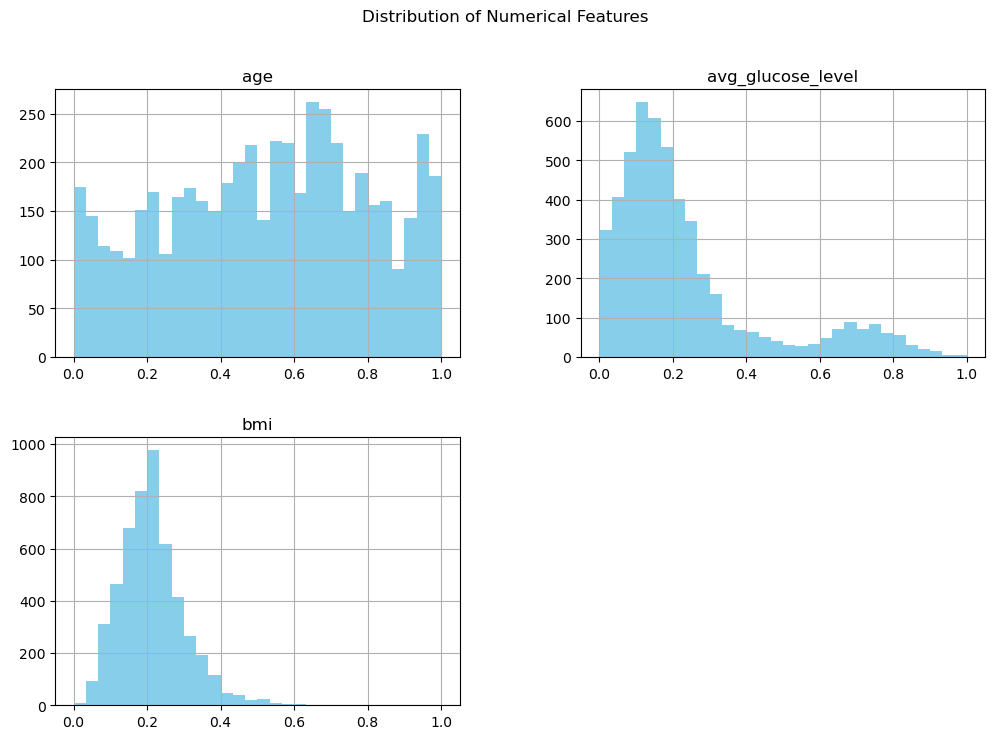

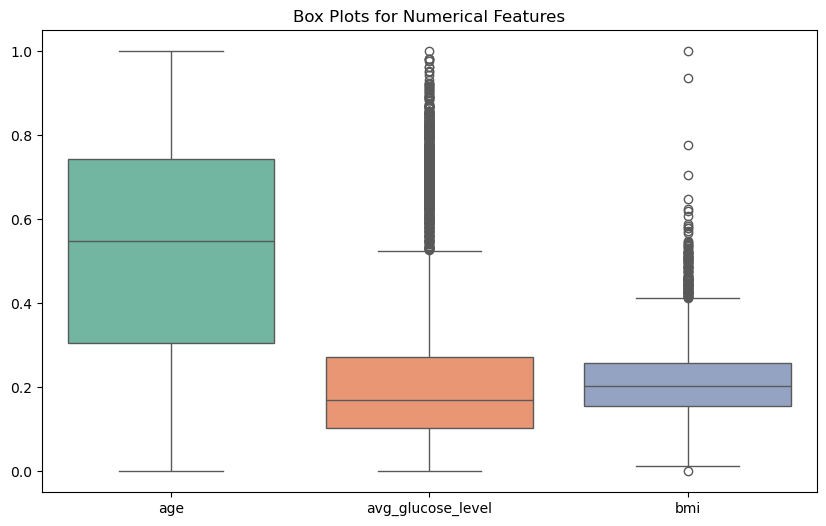

In [11]:
# Plot histograms for numerical features
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
df[numerical_columns].hist(bins=30, figsize=(12, 8), color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Box plots for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns], palette="Set2")
plt.title("Box Plots for Numerical Features")
plt.show()


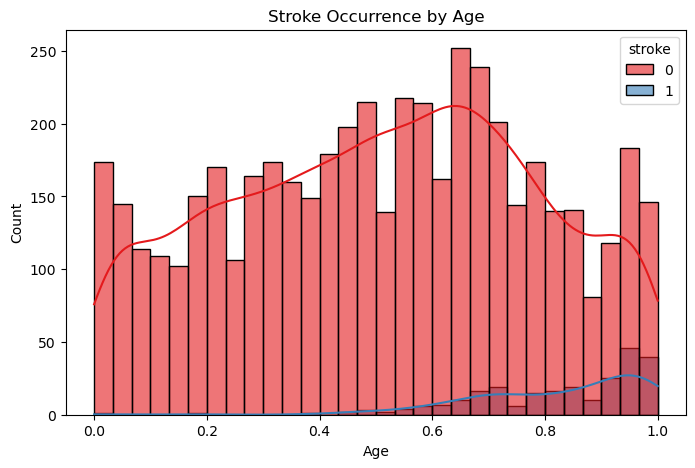

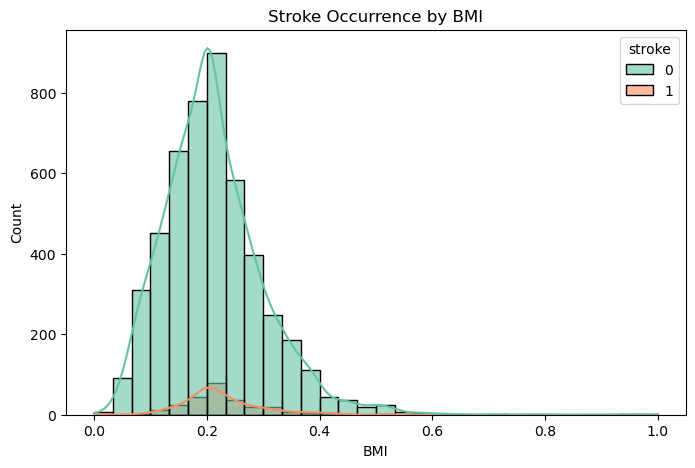

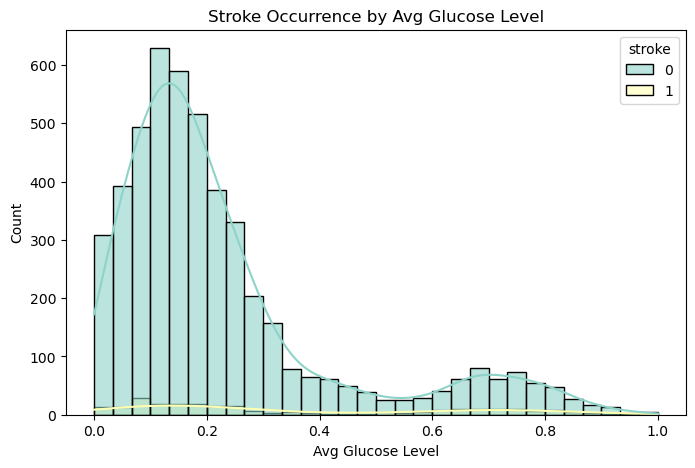

In [12]:
# Stroke vs Age
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='stroke', bins=30, kde=True, palette='Set1', alpha=0.6)
plt.title("Stroke Occurrence by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Stroke vs BMI
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='bmi', hue='stroke', bins=30, kde=True, palette='Set2', alpha=0.6)
plt.title("Stroke Occurrence by BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

# Stroke vs Average Glucose Level
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', bins=30, kde=True, palette='Set3', alpha=0.6)
plt.title("Stroke Occurrence by Avg Glucose Level")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Count")
plt.show()


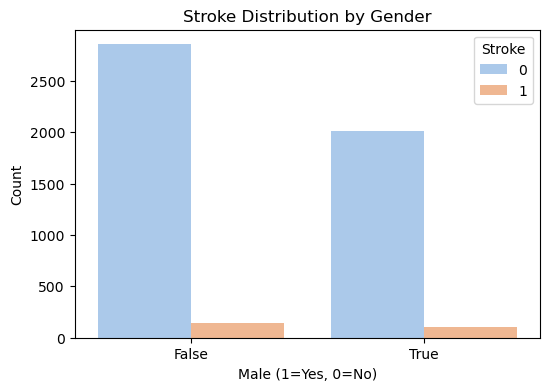

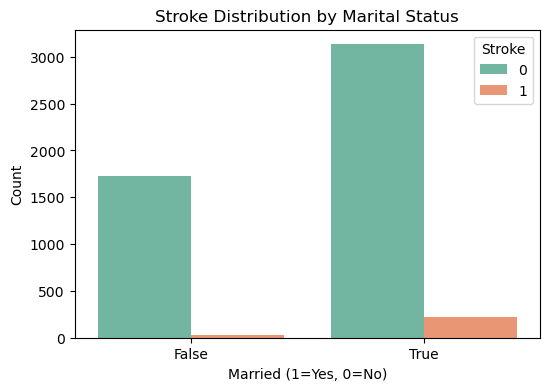

In [13]:
# Stroke distribution by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender_Male', hue='stroke', palette='pastel')
plt.title("Stroke Distribution by Gender")
plt.xlabel("Male (1=Yes, 0=No)")
plt.ylabel("Count")
plt.legend(title="Stroke")
plt.show()

# Stroke distribution by marital status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ever_married_Yes', hue='stroke', palette='Set2')
plt.title("Stroke Distribution by Marital Status")
plt.xlabel("Married (1=Yes, 0=No)")
plt.ylabel("Count")
plt.legend(title="Stroke")
plt.show()


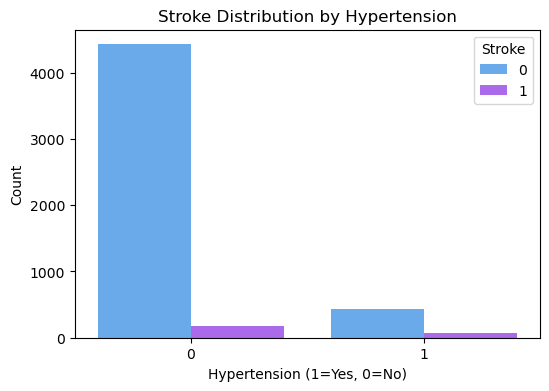

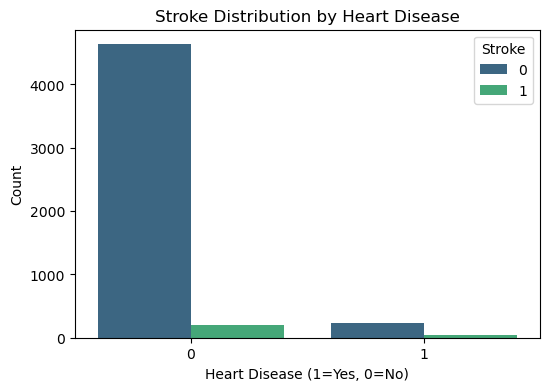

In [14]:
# Stroke distribution by hypertension
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hypertension', hue='stroke', palette='cool')
plt.title("Stroke Distribution by Hypertension")
plt.xlabel("Hypertension (1=Yes, 0=No)")
plt.ylabel("Count")
plt.legend(title="Stroke")
plt.show()

# Stroke distribution by heart disease
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='heart_disease', hue='stroke', palette='viridis')
plt.title("Stroke Distribution by Heart Disease")
plt.xlabel("Heart Disease (1=Yes, 0=No)")
plt.ylabel("Count")
plt.legend(title="Stroke")
plt.show()


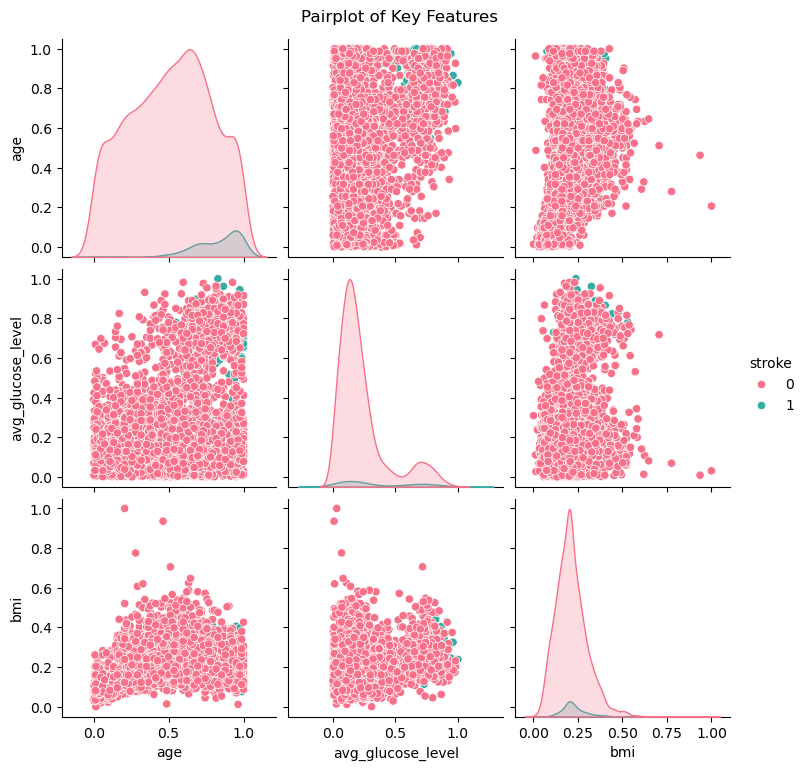

In [15]:
# Pairplot for key numerical features and stroke
key_features = ['age', 'avg_glucose_level', 'bmi', 'stroke']
sns.pairplot(df[key_features], hue='stroke', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


In [16]:
from scipy.stats import ttest_ind

# T-test for age
stroke_group = df[df['stroke'] == 1]['age']
non_stroke_group = df[df['stroke'] == 0]['age']
t_stat, p_value = ttest_ind(stroke_group, non_stroke_group)

print(f"T-test for Age: t-statistic={t_stat:.2f}, p-value={p_value:.3f}")


T-test for Age: t-statistic=18.08, p-value=0.000


In [17]:
# Save the insights of dataset to a new CSV file
df.to_csv('insights_of_healthcare_stroke_data.csv', index=False)

print("insights of dataset saved as 'insights_of_healthcare_stroke_data.csv'")


insights of dataset saved as 'insights_of_healthcare_stroke_data.csv'


In [18]:
# Install required libraries
!pip install sqlalchemy pymysql


Defaulting to user installation because normal site-packages is not writeable


In [19]:
from sqlalchemy import create_engine

# Define database credentials and connection
DATABASE_TYPE = 'mysql'
DBAPI = 'pymysql'
HOST = 'localhost'
USER = 'root'
PASSWORD = 'SQL@1234sql'  # Replace with your MySQL password
DATABASE = 'healthcare_db'
PORT = 3306

# Create connection string
connection_string = f"{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create database engine
engine = create_engine(connection_string)

# Save the cleaned dataset to the SQL database
df.to_sql('stroke_data', con=engine, if_exists='replace', index=False)

print("Data successfully saved to SQL database.")


OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on '1234sql@localhost' ([Errno 11003] getaddrinfo failed)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Connection details
username = "root"
password = "SQL@1234sql"
host = "localhost"
port = 3306
database = "your_database_name"  # Replace with your actual database name

# Create the connection string
connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"

# Create the SQLAlchemy engine
try:
    engine = create_engine(connection_string)
    print("Connection to the database was successful.")
except Exception as e:
    print(f"Error: {e}")

# Example: Save a DataFrame to the database
df = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35]
})

try:
    df.to_sql('example_table', con=engine, if_exists='replace', index=False)
    print("Data successfully saved to SQL database.")
except Exception as e:
    print(f"Error while saving data: {e}")


In [ ]:
pip install pymysql


In [ ]:
import pymysql
from sqlalchemy import create_engine
from urllib.parse import quote_plus  # For encoding special characters in the password

# Credentials
username = "1234sql"  # Replace with your MySQL username
password = "SQL@1234sql"  # Replace with your MySQL password
host = "localhost"  # Replace with the database host
port = 3306  # Default MySQL port
database = "healthcare_db"  # Replace with your database name

try:
    # Encode the password to handle special characters like '@'
    encoded_password = quote_plus(password)

    # Connection string format: mysql+pymysql://<username>:<encoded_password>@<host>:<port>/<database>
    connection_string = f"mysql+pymysql://{username}:{encoded_password}@{host}:{port}/{database}"
    
    # Create the SQLAlchemy engine
    engine = create_engine(connection_string)

    # Test the connection
    with engine.connect() as conn:
        print("Connection to the database was successful.")

        # Example: Save data to a table (replace `your_dataframe` with your DataFrame object)
        # data.to_sql("table_name", con=engine, if_exists="replace", index=False)
        print("Data saved successfully.")

except Exception as e:
    print(f"Error while saving data: {e}")


In [ ]:
import pymysql
from sqlalchemy import create_engine
from urllib.parse import quote

# Credentials
username = "1234sql"  # Your MySQL username
password = "SQL@1234sql"  # Your MySQL password
host = "localhost"  # Database host
port = 3306  # MySQL default port
database = "my_database"  # Your database name

try:
    # Encode the password to handle special characters
    encoded_password = quote(password)  # Encode the password for special characters

    # Connection string: mysql+pymysql://<username>:<encoded_password>@<host>:<port>/<database>
    connection_string = f"mysql+pymysql://{username}:{encoded_password}@{host}:{port}/{database}"

    # Create the SQLAlchemy engine
    engine = create_engine(connection_string)

    # Test the connection
    with engine.connect() as conn:
        print("Connection to the database was successful.")

        # Example: Save data to a table (replace `your_dataframe` with your DataFrame object)
        # your_dataframe.to_sql("table_name", con=engine, if_exists="replace", index=False)
        print("Data saved successfully.")

except Exception as e:
    print(f"Error while saving data: {e}")


In [20]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.816895,0,1,0.801265,0.301260,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,0.743652,0,0,0.679023,0.203895,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,0.975586,0,1,0.234512,0.254296,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,0.597168,0,0,0.536008,0.276060,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,0.963379,1,0,0.549349,0.156930,1,False,False,True,False,False,True,False,False,False,True,False
